LDGM codes
---


Given a source $y\in\{0,1\}^n$ and a so-called Low-Density Generator Matrix (LDGM) $G\in\{0,1\}^{n,k}, k<n$, find $x\in\{0,1\}^k$ such that $d_H(Gx,s)$ is minimal.
Following the notation in \cite{castanheira2010lossy}, we assign indices $i\in 1,\dots,k$ to variables and $a\in 1,\dots,n$ to factors.
The compression rate is given by $R=k/n$.

After the usual change of variables $\sigma_i=(-1)^{x_i}$, $s_a=(-1)^{y_a}$, one has
\begin{equation}
    \begin{aligned}
    \min_x \sum_{a=1}^n (Gx)_a\oplus y_a =&
    \min_x \sum_{a=1}^n \left(\bigoplus_{i\in\partial a}x_i\right)\oplus y_a \\
    =& \min_\sigma \left[-\sum_{a=1}^ns_a\prod_{i\in\partial a}\sigma_i\right]\\
    =& \min_\sigma \mathcal{H}(\sigma)
    \end{aligned}
\end{equation}
The corresponding Boltzmann distribution
\begin{equation}
    P(\sigma) = \frac1Z \prod_{a=1}^n e^{\beta s_a \prod\limits_{i\in\partial a}\sigma_i}
\end{equation}

Max-Sum equations
---

\begin{equation}
\boxed{
    \begin{aligned}
    h_{ia} =& \sum_{b\in\partial i \setminus a} u_{bi}\\
    u_{ai} =& {\rm sign}\left(s_a\prod_{j\in\partial a \setminus i}\sigma_j\right)\min\left\{1,\min_{j\in\partial a \setminus i}|h_{ja}|\right\}
    \end{aligned}
    }
\end{equation}
Notice that the second equation implies $|u_{ai}|\le1$ !


In [31]:
function iter_factor(q, k)
    p[0] = 1-(1-q[0])^k
    p[1] = p[-1] = 0.5*(1-p[0])
    p
end

iter_factor (generic function with 1 method)

In [32]:
function convolve(p1, p2, maxd)
    q = fill(0.0,-maxd:maxd)
    for f1 ∈ eachindex(p1)
        for f2 ∈ eachindex(p2)
            q[clamp(f1+f2, -maxd, maxd)] += p1[f1]*p2[f2]
        end
    end
    q
end


function iter_variable(p,d, maxd)
    q = fill(0.0, -maxd:maxd); q[0]=1
    for i in 1:d
        q = convolve(q,p, maxd)
    end
    q ./= sum(q)
    
end

iter_variable (generic function with 1 method)

In [33]:
function iter_slow_factor(q, k)
    N = lastindex(q)
    p = fill(0.0, -1:1)
    for s in (-1,1)
        for fs ∈ Iterators.product(fill(-N:N,k)...)
            f = min(1, minimum(abs.(fs)))*sign(prod(fs)*s)
            p[f] += prod(q[f1] for f1 ∈ fs)
        end
    end
    p ./= sum(p)
end


iter_slow_factor (generic function with 1 method)

In [34]:
function iter_slow_var(p, d) 
    N = lastindex(p)
    q = fill(0.0, -d:d)
    for us in Iterators.product(fill(-1:1,d)...)
        h = sum(us)
        q[h] += prod(p[u] for u ∈ us)
    end
    q ./= sum(q)
end

iter_slow_var (generic function with 1 method)

In [35]:
using OffsetArrays
p = OffsetArray([0.4, 0.2, 0.4], -1:1)
iter_slow_var(p, 3)

7-element OffsetArray(::Vector{Float64}, -3:3) with eltype Float64 with indices -3:3:
 0.064
 0.096
 0.24
 0.19999999999999998
 0.24
 0.096
 0.064

In [36]:
iter_variable(p,3, 5)

11-element OffsetArray(::Vector{Float64}, -5:5) with eltype Float64 with indices -5:5:
 0.0
 0.0
 0.06399999999999999
 0.09599999999999999
 0.23999999999999996
 0.19999999999999998
 0.23999999999999994
 0.09599999999999999
 0.06399999999999999
 0.0
 0.0

In [37]:
q = OffsetArray([0.1, 0.05, 0.7, 0.05, 0.1], -2:2)

5-element OffsetArray(::Vector{Float64}, -2:2) with eltype Float64 with indices -2:2:
 0.1
 0.05
 0.7
 0.05
 0.1

In [38]:
iter_slow_factor(q, 3)

3-element OffsetArray(::Vector{Float64}, -1:1) with eltype Float64 with indices -1:1:
 0.013500000000000024
 0.9730000000000001
 0.013500000000000024

In [39]:
iter_factor(q,3)

3-element OffsetArray(::Vector{Float64}, -1:1) with eltype Float64 with indices -1:1:
 0.013500000000000012
 0.973
 0.013500000000000012

RS over Max-Sum
---
We have, for fixed degrees

\begin{equation}
    \begin{aligned}
p_k\left(u\right)= &\sum_{h_{1},\dots,h_{k}}\sum_s\frac12\delta\left(u,\min\left\{1,\min_{j=1,\dots,k}\left|h_{j}\right|\right\}\text{sign}\left(s\prod_{j=1}^{k}h_{j}\right)\right)\prod_{j=1}^{k}q\left(h_{j}\right)\\
q_d\left(h\right)=&\sum_{u_{1},\dots,u_{d}} \delta\left(h,\sum_{a=1}^{d} u_a \right)\prod_{a=1}^{d} p(u_a)
\end{aligned}
\end{equation}
and averaging over the degree profile,
\begin{equation}
 \begin{aligned}
    p(u) &\propto \sum_k k K_k p_{k-1}(u)\\
q(h) &\propto \sum_d d \Lambda_d q_{d-1}(h)
\end{aligned}
\end{equation}

Following the same steps as in the case of LDPC codes and using the fact that $|u|\le1$,

\begin{equation}
   \boxed{
   \begin{aligned}
   p_k(u) =& p_0\delta_0+(1-p_0)\frac{\delta_{+1}+\delta_{-1}}{2},\quad p_0=1-\left(1-q(0)\right)^k
%   \begin{cases}
%   1 - \left[1-q(0)\right]^{k} & u=0\\
%   \frac{\left[1-q(0)\right]^{k}}{2} & u=1
%   \end{cases}
   \\
   q_d(h) =& p\underbrace{ \circledast\dots\circledast}_{d \text{ times}}p
   \end{aligned}}
\end{equation}


In [65]:
function RS(Pk, Λ; tol=1e-10, maxiter=1000, damp=0.9, maxd=lastindex(Λ))
    ks = [k for k in eachindex(Pk) if Pk[k] > tol]
    ds = [d for d in eachindex(Λ) if Λ[d] > tol]
    @assert sum(Pk[ks]) ≈ 1 && sum(Λ[ds]) ≈ 1
    
    R =  sum(k*Pk[k] for k=ks) / sum(d*Λ[d] for d=ds)

    p = fill(1.0, -1:1); p ./= sum(p)
    q = fill(0.0, -maxd:maxd) 
    err = Inf
    for iter=1:maxiter
        q1 = sum(d*Λ[d]*iter_variable(p, d-1, maxd) for d=ds)
        q1 ./= sum(q1)
        p1 = sum(k*Pk[k]*iter_factor(q, k-1) for k=ks)
        p1 ./= sum(p1)
        err = min(maximum(abs, p1 - p),maximum(abs, q1 - q)) ; err < tol && (@show err iter; break)
        q .= q .* damp .+ q1 .* (1-damp)
        p .= p .* damp .+ p1 .* (1-damp)
    end
    
    O = sum(Pk[k]*iter_factor(q,k)[0] for k in ks)
    O += 2R*sum(h*q[h] for h in 1:lastindex(q))
    q2 = sum(Λ[d]*(d-1)*iter_variable(p,d,maxd) for d in ds)
    O += -R*(sum(abs(h)*q[h] for h in eachindex(q)))
    D = (1-O)/2
    p, q, R, D
end

RS (generic function with 1 method)

In [66]:
Λ = OffsetArray([0, 0, 0.7, 0.3], 0:3)
Pk = OffsetArray([0, 0, 1, 0], 0:3)
p, q, R, D = RS(Pk, Λ) 

err = 9.940492873283802e-11
iter = 876


([0.33333333362315387, 0.33333333275369254, 0.33333333362315387], [0.0, 0.043478260966471595, 0.28985507259297666, 0.33333333288110356, 0.28985507259297666, 0.043478260966471595, 0.0], 0.8695652173913044, 0.22222222252370877)

In [84]:
Λ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Pk = [0.0, 0.47503043913819326, 0.30221581935769426, 0.06798702078697771, 0.0, 0.0, 0.0, 0.0, 0.1547667207171349]
p, q, R, D = RS(Pk, Λ) 
D

err = 9.986472759848652e-11
iter = 542


0.2156444820259164

In [86]:
q

15-element OffsetArray(::Vector{Float64}, -7:7) with eltype Float64 with indices -7:7:
 0.0
 8.84543182972591e-5
 0.001452848305006628
 0.010473561554558582
 0.043555245091229614
 0.11560741257294464
 0.2049883491535018
 0.24766825800892286
 0.2049883491535018
 0.11560741257294464
 0.043555245091229614
 0.010473561554558582
 0.001452848305006628
 8.84543182972591e-5
 0.0

In [88]:
rr = 0.01:0.01:0.99
Rrs = zero(rr)
Drs = zero(rr)
for (i,r) in pairs(rr)
    k=floor(Int, 2/r)
    s=k+1-2/r
    Λ=[fill(0,k-1); s; 1-s]
    Λ .*= Λ .> 1e-10
    Λ ./ sum(Λ)
    _,_,Rrs[i] ,Drs[i] = RS([0,1],Λ, tol=1e-15, maxiter=10^4)
end

err = 9.298117831235686e-16
iter = 318
err = 9.71445146547012e-16
iter = 319
err = 9.575673587391975e-16
iter = 321
err = 9.43689570931383e-16
iter = 344
err = 9.853229343548264e-16
iter = 364
err = 9.159339953157541e-16
iter = 352
err = 9.71445146547012e-16
iter = 361
err = 9.43689570931383e-16
iter = 329
err = 9.43689570931383e-16
iter = 411
err = 9.575673587391975e-16
iter = 450
err = 9.71445146547012e-16
iter = 439
err = 9.71445146547012e-16
iter = 374
err = 9.992007221626409e-16
iter = 374
err = 9.298117831235686e-16
iter = 453
err = 9.992007221626409e-16
iter = 369
err = 9.298117831235686e-16
iter = 417
err = 9.71445146547012e-16
iter = 476
err = 9.43689570931383e-16
iter = 318
err = 9.159339953157541e-16
iter = 423
err = 9.43689570931383e-16
iter = 616
err = 9.992007221626409e-16
iter = 419
err = 8.049116928532385e-16
iter = 301
err = 9.71445146547012e-16
iter = 391
err = 9.992007221626409e-16
iter = 517
err = 9.43689570931383e-16
iter = 705
err = 9.71445146547012e-16
iter = 507

In [89]:
[rr Rrs]

99×2 Matrix{Float64}:
 0.01  0.01
 0.02  0.02
 0.03  0.03
 0.04  0.04
 0.05  0.05
 0.06  0.06
 0.07  0.07
 0.08  0.08
 0.09  0.09
 0.1   0.1
 0.11  0.11
 0.12  0.12
 0.13  0.13
 ⋮     
 0.88  0.88
 0.89  0.89
 0.9   0.9
 0.91  0.91
 0.92  0.92
 0.93  0.93
 0.94  0.94
 0.95  0.95
 0.96  0.96
 0.97  0.97
 0.98  0.98
 0.99  0.99

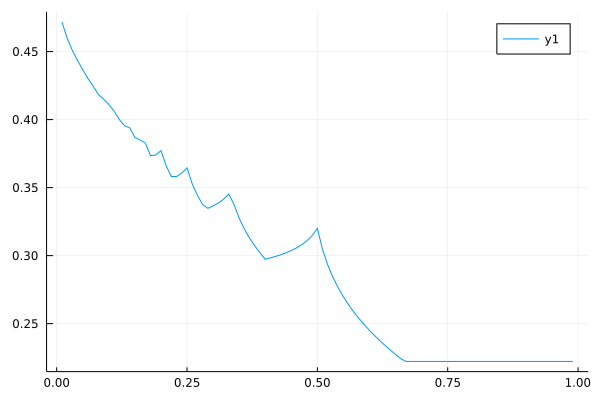

In [83]:
using Plots
plot(Rrs, Drs)